In [1]:
#import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
%matplotlib inline

In [2]:
# Read the data from 'poly.csv' to a dataframe
df = pd.read_csv('poly.csv')

# Get the column values for x & y in numpy arrays
x = df[['x']].values
y = df['y'].values


In [3]:
# Take a quick look at the dataframe
df.head()

,x,y
0,-3.292157,-46.916988
1,0.799528,-3.941553
2,-0.936214,-2.800522
3,-4.722680,-103.030914
4,-3.602674,-54.020819


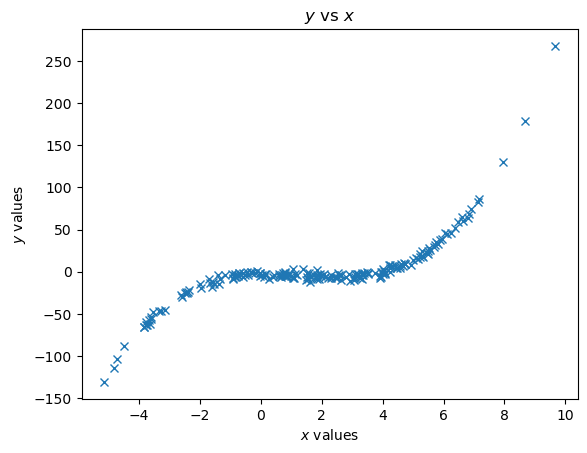

In [4]:
# Plot x & y to visually inspect the data

fig, ax = plt.subplots()
ax.plot(x,y,'x')
ax.set_xlabel('$x$ values')
ax.set_ylabel('$y$ values')
ax.set_title('$y$ vs $x$');

In [5]:
# Fit a linear model on the data
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x, y)

# Get the predictions on the entire data using the .predict() function
y_lin_pred = model.predict(x)


In [6]:
### edTest(test_deg) ###
# Import the necessary module for polynomial features
from sklearn.preprocessing import PolynomialFeatures

# GUESS the correct polynomial degree based on the above graph
guess_degree = 3  # Replace 3 with your best guess based on the data visualization

# Generate polynomial features on the entire data
x_poly = PolynomialFeatures(degree=guess_degree).fit_transform(x)



In [7]:
# Fit a polynomial model on the data, using x_poly as features
# Note: since PolynomialFeatures adds an intercept by default
# we set fit_intercept to False to avoid having 2 intercepts
polymodel = LinearRegression(fit_intercept=False)
polymodel.fit(x_poly, y)

# Get predictions for the polynomial model
y_poly_pred = polymodel.predict(x_poly)


In [8]:
# To visualise the results, we create a linspace of evenly spaced values
# This ensures that there are no gaps in our prediction line as well as
# avoiding the need to create a sorted set of our data.
# Worth examining and understand the code 

# create an array of evenly spaced values
x_l = np.linspace(np.min(x),np.max(x),100).reshape(-1, 1)

# Prediction on the linspace values
y_lin_pred_l = model.predict(x_l)

# PolynomialFeatures on the linspace values
x_poly_l= PolynomialFeatures(degree=guess_degree).fit_transform(x_l)

# Prediction on the polynomial linspace values
y_poly_pred_l = polymodel.predict(x_poly_l)

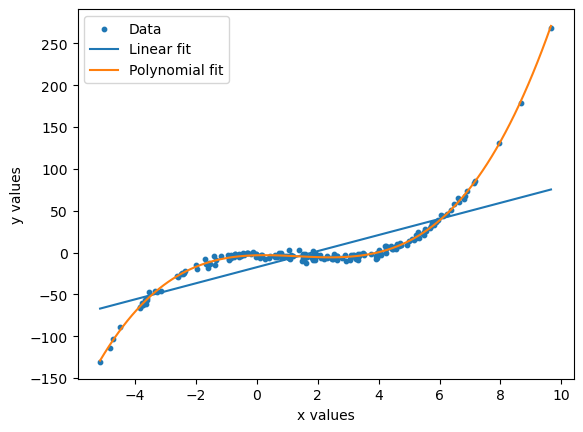

In [18]:
# First plot x & y values using plt.scatter
plt.scatter(x, y, s=10, label="Data")

# Now, plot the linear regression fit curve (using linspace)
x_linspace = np.linspace(x.min(), x.max(), 100).reshape(-1, 1)
y_lin_fit = model.predict(x_linspace)
plt.plot(x_linspace, y_lin_fit, label="Linear fit")

# Also plot the polynomial regression fit curve (using linspace)
x_polyspace = np.linspace(x.min(), x.max(), 100).reshape(-1, 1)
x_polyspace_transformed = PolynomialFeatures(degree=guess_degree).fit_transform(x_polyspace)
y_poly_fit = polymodel.predict(x_polyspace_transformed)
plt.plot(x_polyspace, y_poly_fit, label="Polynomial fit")

# Assigning labels to the axes
plt.xlabel("x values")
plt.ylabel("y values")
plt.legend()
plt.show()


In [14]:
### edTest(test_poly_predictions) ###
# Calculate the residual values for the polynomial model
poly_residuals = y - y_poly_pred

In [15]:
### edTest(test_linear_predictions) ###
#Calculate the residual values for the linear model
lin_residuals = y - y_lin_pred

Text(0.5, 0.98, 'Residual Analysis (Linear vs Polynomial)')

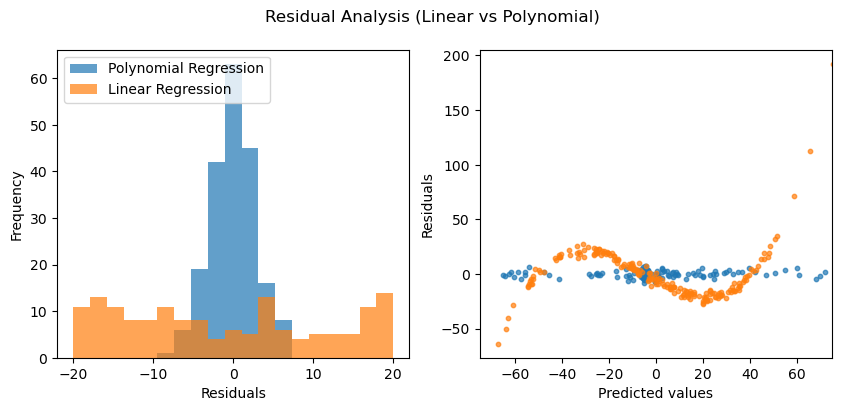

In [17]:
# Distribution of residuals
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
bins = np.linspace(-20, 20, 20)
ax[0].set_xlabel('Residuals')
ax[0].set_ylabel('Frequency')

# Plot the histograms for the polynomial regression
ax[0].hist(poly_residuals, bins, label='Polynomial Regression', alpha=0.7)

# Plot the histograms for the linear regression
ax[0].hist(lin_residuals, bins, label='Linear Regression', alpha=0.7)

ax[0].legend(loc='upper left')

# Distribution of predicted values with the residuals
ax[1].scatter(y_poly_pred, poly_residuals, s=10, label='Polynomial Regression', alpha=0.7)
ax[1].scatter(y_lin_pred, lin_residuals, s=10, label='Linear Regression', alpha=0.7)
ax[1].set_xlim(-75, 75)
ax[1].set_xlabel('Predicted values')
ax[1].set_ylabel('Residuals')

fig.suptitle('Residual Analysis (Linear vs Polynomial)')


## Question: 
Do you think that polynomial degree is appropriate. Experiment with a degree of polynomial =2 and comment on what you observe for the residuals.